# load and read the data


load the data using use the requests.get(), The data file "recs2009_public.csv" will be downloaded in the same directory as this jupyternotebook "energy.ipynb":

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
import requests
URL = "https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv"
response = requests.get(URL)
open("recs2009_public.csv", "wb").write(response.content)
df = pd.read_csv('recs2009_public.csv')

/tmp/ipykernel_9594/1019431269.py:5: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('recs2009_public.csv')


# study the Data and Data Cleaning

#Quick look at the data structure: 4 first rows of data to get a view of it:

In [79]:
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


#it can be seen that there are 940 attributes. The info() method gets a quick description of the data, the total numbers of rows and each attribute's type and the number of non-null values.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


#there are some of the attributes which are not numerical and they are objects (they must be text attributes because this is a CSV file).


#by describe() method I can see the summary of the "KWH":

In [81]:
df.describe()['KWH']

count     12083.000000
mean      11288.159398
std        7641.190845
min          17.000000
25%        5837.000000
50%        9623.000000
75%       14765.000000
max      150254.000000
Name: KWH, dtype: float64

#to check if there is null values. So there is not any null values.

In [82]:
df.isnull().sum()

DOEID                0
REGIONC              0
DIVISION             0
REPORTABLE_DOMAIN    0
TYPEHUQ              0
                    ..
WSF                  0
OA_LAT               0
GWT                  0
DesignDBT99          0
DesignDBT1           0
Length: 940, dtype: int64

In [83]:
df.shape

(12083, 940)

#dropna() delete null values.

In [84]:
df.dropna().shape 

(12083, 940)

#because the dimonsion of the dataframe is not changed after using dropna() method, so one more time I am confident that there is not null values.

#one way to quick study of the data and is  to  plot  a  histogram. By looking at the figure, I found that my labales (target attribute which is "KWH") is "tail heavy". So it may make it harder for a machine learning algorithm to detect patterns.So it would be better to transforme it to a bell-shaped distributions.

<AxesSubplot:>

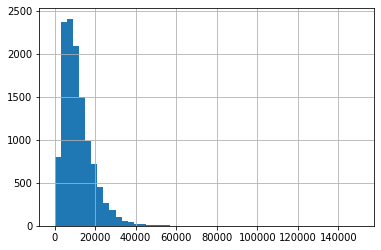

In [85]:
df.KWH.hist(bins=50)

In [86]:
df[df.KWH <0]

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1


In [87]:
df[df.KWH >60000]

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
1362,1363,3,5,14,2,12661.58,5342,812,5276,914,...,-2,4A,2102,0,4779,0.44,3,57,16,90
3551,3552,3,5,17,2,9242.95,1736,2540,1726,2334,...,-2,1A-2A,290,136,638,0.38,17,69,32,96
4212,4213,2,3,6,2,19177.03,6788,481,6669,721,...,-2,5A,3247,0,6868,0.61,3,52,2,86
4418,4419,3,5,17,2,6557.74,266,3920,207,3775,...,-2,1A-2A,66,377,25,0.33,28,78,48,92
4712,4713,3,5,17,2,6540.32,623,3475,618,3254,...,-2,1A-2A,18,317,16,0.42,25,77,44,91
4839,4840,4,10,26,2,6466.42,1048,1096,1231,789,...,-2,3B-4B,37,153,1018,0.40,1,58,46,85
8112,8113,4,10,27,2,10270.16,6385,253,7126,137,...,-2,5B-5C,2940,0,6074,0.62,0,48,12,93
9129,9130,2,3,6,2,19177.03,6359,579,6656,687,...,-2,5A,3093,22,6706,0.59,2,53,10,88
10220,10221,2,4,12,2,2566.03,4587,1227,4622,1439,...,-2,4A,2000,40,3850,0.44,6,58,10,90


<AxesSubplot:>

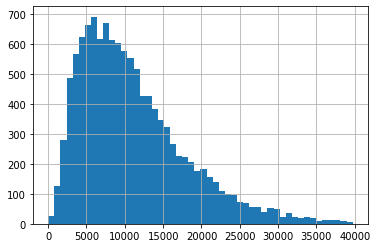

In [88]:
df.KWH[df.KWH <40000].hist(bins=50)

#some of Machine learning algorithms like linear regression require numeric input data so if they are used with string-based categorical data, they will throw an error. Because of that I need to encode the categorical data as numeric dummy variables. Before cleaning I saved a copy of data in df_original to be unchanged.

In [89]:
df_original = df.copy()

In [90]:
df = pd.get_dummies(df)

#Here I test the "StandardScaler" on some part of data to check if it works well:

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test=df.iloc[0:4,0:6]
df_test_reduced = scaler.fit_transform(df_test)
df_test_reduced

array([[-1.34164079, -0.22941573, -0.1490712 ,  0.05415304, -0.57735027,
        -1.27047402],
       [-0.4472136 ,  1.60591014,  1.63978318,  1.57043805, -0.57735027,
        -0.16458545],
       [ 0.4472136 , -1.14707867, -1.04349839, -1.13721376,  1.73205081,
        -0.09767254],
       [ 1.34164079, -0.22941573, -0.4472136 , -0.48737732, -0.57735027,
         1.53273202]])

In [95]:
df_test_reduced.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

# Create a Test Set:

#The generalization of the Machine Learning model should be check for applying on new cases. One way is to split the data into two sets, training set and test set. By evaluating the model on the test set, there would be an estimate of the generalization error on the new cases.
A very simple and effctive way to split the data is using "train-test-split" functions from Scikit-Learn.This function works well if the data set is large in comparison to the number of attributes, but if it is not, a significant sampling bias will be introduced in the system. In this project I assume that the dataset is large enough to use the "trai-test-split" function.

In [96]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

In [97]:
train_set.shape

(9666, 1001)

In [98]:
test_set.shape

(2417, 1001)

In [99]:
y_train, y_test= train_set['KWH'], test_set['KWH']
X_train = train_set.drop('KWH', axis =1)
X_test = test_set.drop('KWH', axis =1)

# Feature scaling

#Another tranformation needs to be done to the data is "feature scaling".The machine learning algorithms usually don't perform well when the input numerical attributes have very different scales.Here I used "Standardization" to scale the data. Scikit-Learn provides a transformer called "StandardScaler" for standardization. Important point is to fit the scalers to the training data only, not to the full dataset:

In [100]:
scaler = StandardScaler()
X_train_reduced=scaler.fit_transform(X_train)
#X_train_reduced.mean(axis=0)
#print(X_train_reduced.shape, X_test.shape, y_train.shape, y_test.shape)

In [101]:
#from sklearn.linear_model import LinearRegression
#lin_reg_nonpca = LinearRegression()
#lin_reg_nonpca.fit(X_train_reduced, y_train)

In [102]:
X_train_reduced.std(axis=0);

In [103]:
#from sklearn.linear_model import Ridge
#ridge = Ridge()
#ridge.fit(X_train_reduced, y_train)
#ridge.score(X_test_reduced, y_test)

In [104]:
#lin_reg_2 = LinearRegression()
#lin_reg_2.fit(X_train_reduced, y_train)
#lin_reg_2.score(X_test_reduced, y_test)

In [105]:
scaler2 = StandardScaler()
X_test_reduced=scaler2.fit_transform(X_test)
X_test_reduced.mean(axis=0);

In [106]:
#lin_reg_nonpca.score(X_test_reduced,y_test)

# Reduce the dimonsinality 

#In this problem there are large numbers of attributes so it is not easy to find correlation between the variables  so I used "PCA" class in Scikit-Learn to reduce the dimonsinality of the dataset. Principal component analysis(PCA) is a technique to find undelying correlation exist in a very large dataset.
#The following code computes the minimum number of dimensions required to preserve 95% of the training set's variance:

In [107]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_reduced_pca = pca.fit_transform(X_train_reduced)

In [108]:
pca.components_.max(axis=1);

#Now I check if the PCA works well? by looking at the mean of correlation and as they are far from 1 so I am happy. 

In [109]:
X_train_reduced_pca.shape

(9666, 478)

In [110]:
np.corrcoef(X_train_reduced_pca).mean(axis=1)

array([ 0.01045105,  0.00424432,  0.00518042, ...,  0.00665533,
        0.00992282, -0.00014243])

# Training and evaluating the model

#I decided to choose Linear Regression model for training.

In [169]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reduced_pca, y_train)

LinearRegression()

In [113]:
#X_test_reduced.shape


In [114]:
#pca.components_.shape

#As the train set has the different dimension(.shape) than the test set, getting the score (lin_reg.score) not possible. So I took the coefficient component matrix of PCA to make the test set ready:

In [170]:
X_test_prepared=X_test_reduced @ (pca.components_.T)
X_test_prepared.shape


(2417, 478)

In [171]:
y_pred = lin_reg.predict(X_test_prepared)

In [176]:

lin_reg.score(X_test_prepared, y_test)


0.9841664556177011

#the score looks very good.

In [127]:
y_test.shape

(2417,)

In [160]:
y_pred.shape

(2417,)

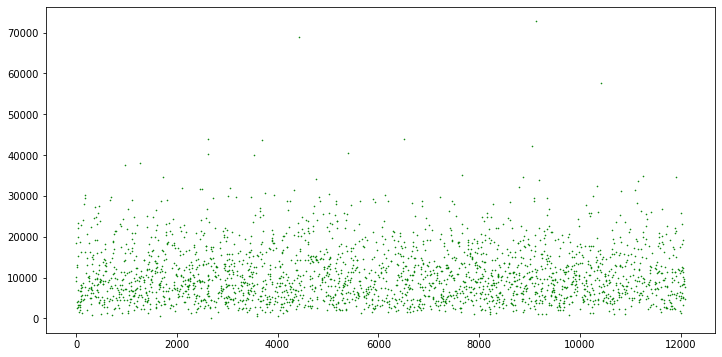

In [158]:
fig, ax = plt.subplots(figsize=(12, 6))
#fig.set_size_inches(18.5, 10.5)
plt.plot(y_test,'go',markersize=0.6)
#plt.plot(y_pred,'ro',label='prediction',markersize=0.6)
#plt.plot( y_test,'go', label='test',markersize=0.6)
#plt.legend()

(array([  1.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          3.,   1.,   2.,   5.,   0.,   4.,   3.,   5.,  11.,  20.,  18.,
         25.,  39.,  60.,  66.,  80.,  98., 116., 121., 121., 143., 153.,
        161., 140., 118., 133., 131., 105.,  95.,  83.,  51.,  61.,  47.,
         33.,  25.,  22.,  26.,  19.,  10.,  12.,   5.,   6.,   5.,   4.,
          3.,   6.,   2.,   5.,   3.,   0.,   2.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-4607.7406509 , -4460.57784334, -4313.41503578, -4166.25222822,
        -4019.08942066, -3871.9266131 , -3724.76380554, -3577.60099798,
        -3430.43819042, -3283.27538287, -3136.11257531, -2988.94976775,
        -2841.78696019, -2694.62415263, -2547.46134507, -2400.29853751,
        -2253.13572995, -2105.

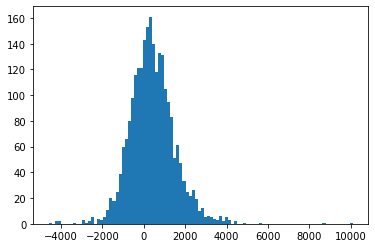

In [44]:
plt.hist(y_pred-y_test, bins=100)

#To avoid our model be overfitted or underfitted, regularization can be added to the model:
"Ridge" which is a regularized version of Linear Regression (a regularization term is added to the cost function). The hyperparameter "alpha" controls how much I want to regularize the model. If alpha=0 the the Ridge is linear regression.

In [46]:
ridge2 = Ridge(alpha=100)
ridge2.fit(X_train_reduced_pca, y_train)
ridge2.score(X_test_prepared, y_test)

0.9730470190984059

#The score looks promissing

#I also tried "Lasso" for modeling the data. is  another  regularized  version  of  Linear  Regression, just  like  Ridge, it adds a regularization term to the cost function. 

In [114]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=10)
lasso.fit(X_train_reduced_pca, y_train)
lasso.score(X_test_prepared, y_test)

0.9736559524038818

# Conclusion

In conclusion, I think linear regression model can predicts electric consumption relatively good.